In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

In [ ]:
def detect_faces_mtcnn(image_path, min_confidence=0.9):
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        raise FileNotFoundError(f"Не знайшли файл {image_path}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    detector = MTCNN()

    results = detector.detect_faces(img_rgb)

    for res in results:
        conf = res['confidence']
        if conf < min_confidence:
            continue
        x, y, w, h = res['box']
        x, y = max(0, x), max(0, y)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

        for point in res['keypoints'].values():
            cv2.circle(img_rgb, point, 2, (0, 0, 255), 2)
        cv2.putText(img_rgb, f"{conf:.2f}", (x, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    plt.figure(figsize=(8,8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

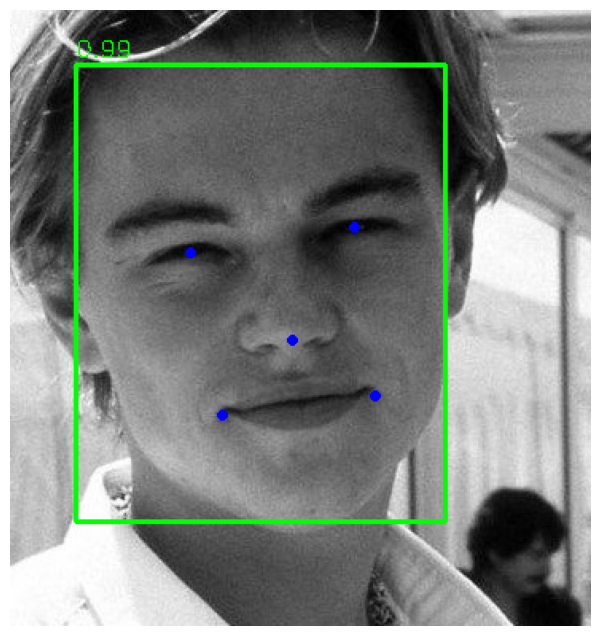

In [ ]:
detect_faces_mtcnn("/content/drive/MyDrive/105_classes_pins_dataset/pins_Leonardo DiCaprio/Leonardo DiCaprio104_2476.jpg")